In [1]:
from glob import glob
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

/Applications/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
sal = ''
data = ''

csv_paths = glob(data + '/*csv')

df_lst = []
for csv in csv_paths:
    df = pd.read_csv(csv)
    df_lst.append(df)

concat_df = pd.concat(df_lst)
df = concat_df.dropna().reset_index()
del df['index']
df.shape

(5986, 30)

In [3]:
df.head()

,NAME,TEAM_NAME,YEAR,RK,POS,AGE,G,PA,AB,R,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,Miguel Montero,ARI,2012,1,C,28,141,573,486.0,65.0,...,0.391,0.438,0.829,123.0,213.0,15.0,12.0,0.0,2.0,6.0
1,Paul Goldschmidt,ARI,2012,2,1B,24,145,587,514.0,82.0,...,0.359,0.490,0.850,126.0,252.0,9.0,4.0,0.0,9.0,4.0
2,Aaron Hill,ARI,2012,3,2B,30,156,668,609.0,93.0,...,0.360,0.522,0.882,133.0,318.0,15.0,4.0,1.0,2.0,7.0
3,Willie Bloomquist,ARI,2012,4,SS,34,80,338,324.0,47.0,...,0.325,0.398,0.724,94.0,129.0,5.0,0.0,0.0,2.0,0.0
4,Ryan Roberts,ARI,2012,5,3B,31,83,280,252.0,28.0,...,0.306,0.357,0.663,78.0,90.0,10.0,0.0,2.0,4.0,1.0


## create a new index, remove some columns, get a data frame of only integers to create scatterplot

In [4]:
idx = [i for i in range(len(df))]
df['index']= idx
df = df.set_index('index')

non_pitcher = df[df['POS']!= 'P'].dropna()

all_df_cols = non_pitcher.columns.tolist()
bad_cols = ['AGE','index','NAME', 'TEAM_NAME', 'YEAR', 
            'RK', 'POS', 'BA', 'PA','GDP', 
            'HBP', 'SH', 'SF', 'IBB',
           'OPS','SLG','OBP', 'OPS+']

good_cols = [i for i in all_df_cols if i not in bad_cols]

above_0hr = non_pitcher[non_pitcher['H']  != 0]
good_df = above_0hr[good_cols]

int_cols = [i for i in good_df.columns.tolist()]

good_df[int_cols] = good_df[int_cols].astype(int)
good_df.head()

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,TB
index,,,,,,,,,,,,,
0,141,486,65,139,25,2,15,88,0,0,73,130,213
1,145,514,82,147,43,1,20,82,18,3,60,130,252
2,156,609,93,184,44,6,26,85,14,5,52,86,318
3,80,324,47,98,21,5,0,23,7,10,12,55,129
4,83,252,28,63,9,0,6,34,6,3,22,45,90


# create subplots from any number of integer/float data frame columns:
    > len(df.columns) == len(axes.flatten())
    >    ^^^ 13^^^              ^^12^^  (4,3)
#### How it works:
    > creates new df WITHOUT x_axis_column to use as y axis columns
    > create dict mapping column names to len(new_df.columns)
    > uses new integer column names as index to subplot & sets names from old column names using index

In [5]:
def subplot_df(df_to_plot, x_axis_column, row_col_grid_tup, fig_size):
    """
    
        MAKE SUBPLOTS OF INTEGER DATA FRAMES:
        PARAMS: df_to_plot - df 
    
    
    """
    

    # get a list of all columns except X-axis column
    include_cols = [i for i in df_to_plot.columns.tolist() if x_axis_column not in i]  # x_axis_column

    # make a new df of ONLY Y AXIS COLUMNS 
    plot_df = df_to_plot[include_cols]

    # rename df cols to numbers so we can plot by enumeration index
    new_col_names = [i for i in range(0, len(plot_df.columns))]
    old_col_names = [i for i in plot_df.columns.tolist()]
    zipped_names = dict(zip(old_col_names, new_col_names))

    plot_df = plot_df.rename(columns=zipped_names)
    

    fig, axes = plt.subplots(nrows=row_col_grid_tup[0], ncols=row_col_grid_tup[1], figsize=(fig_size[0],fig_size[1]))


    for idx, ax in enumerate(axes.flatten()):
        ax.scatter(df_to_plot[x_axis_column], plot_df[idx])
        ax.set_title("{} by {}".format(x_axis_column,old_col_names[idx]))
        ax.set_xlabel(x_axis_column)
        ax.grid('on')
        ax.set_ylabel(old_col_names[idx])
        plt.tight_layout()

# create a list of df column names & change index & easily create scatterplots of entire data frames 

In [6]:
len(good_df.columns)

13

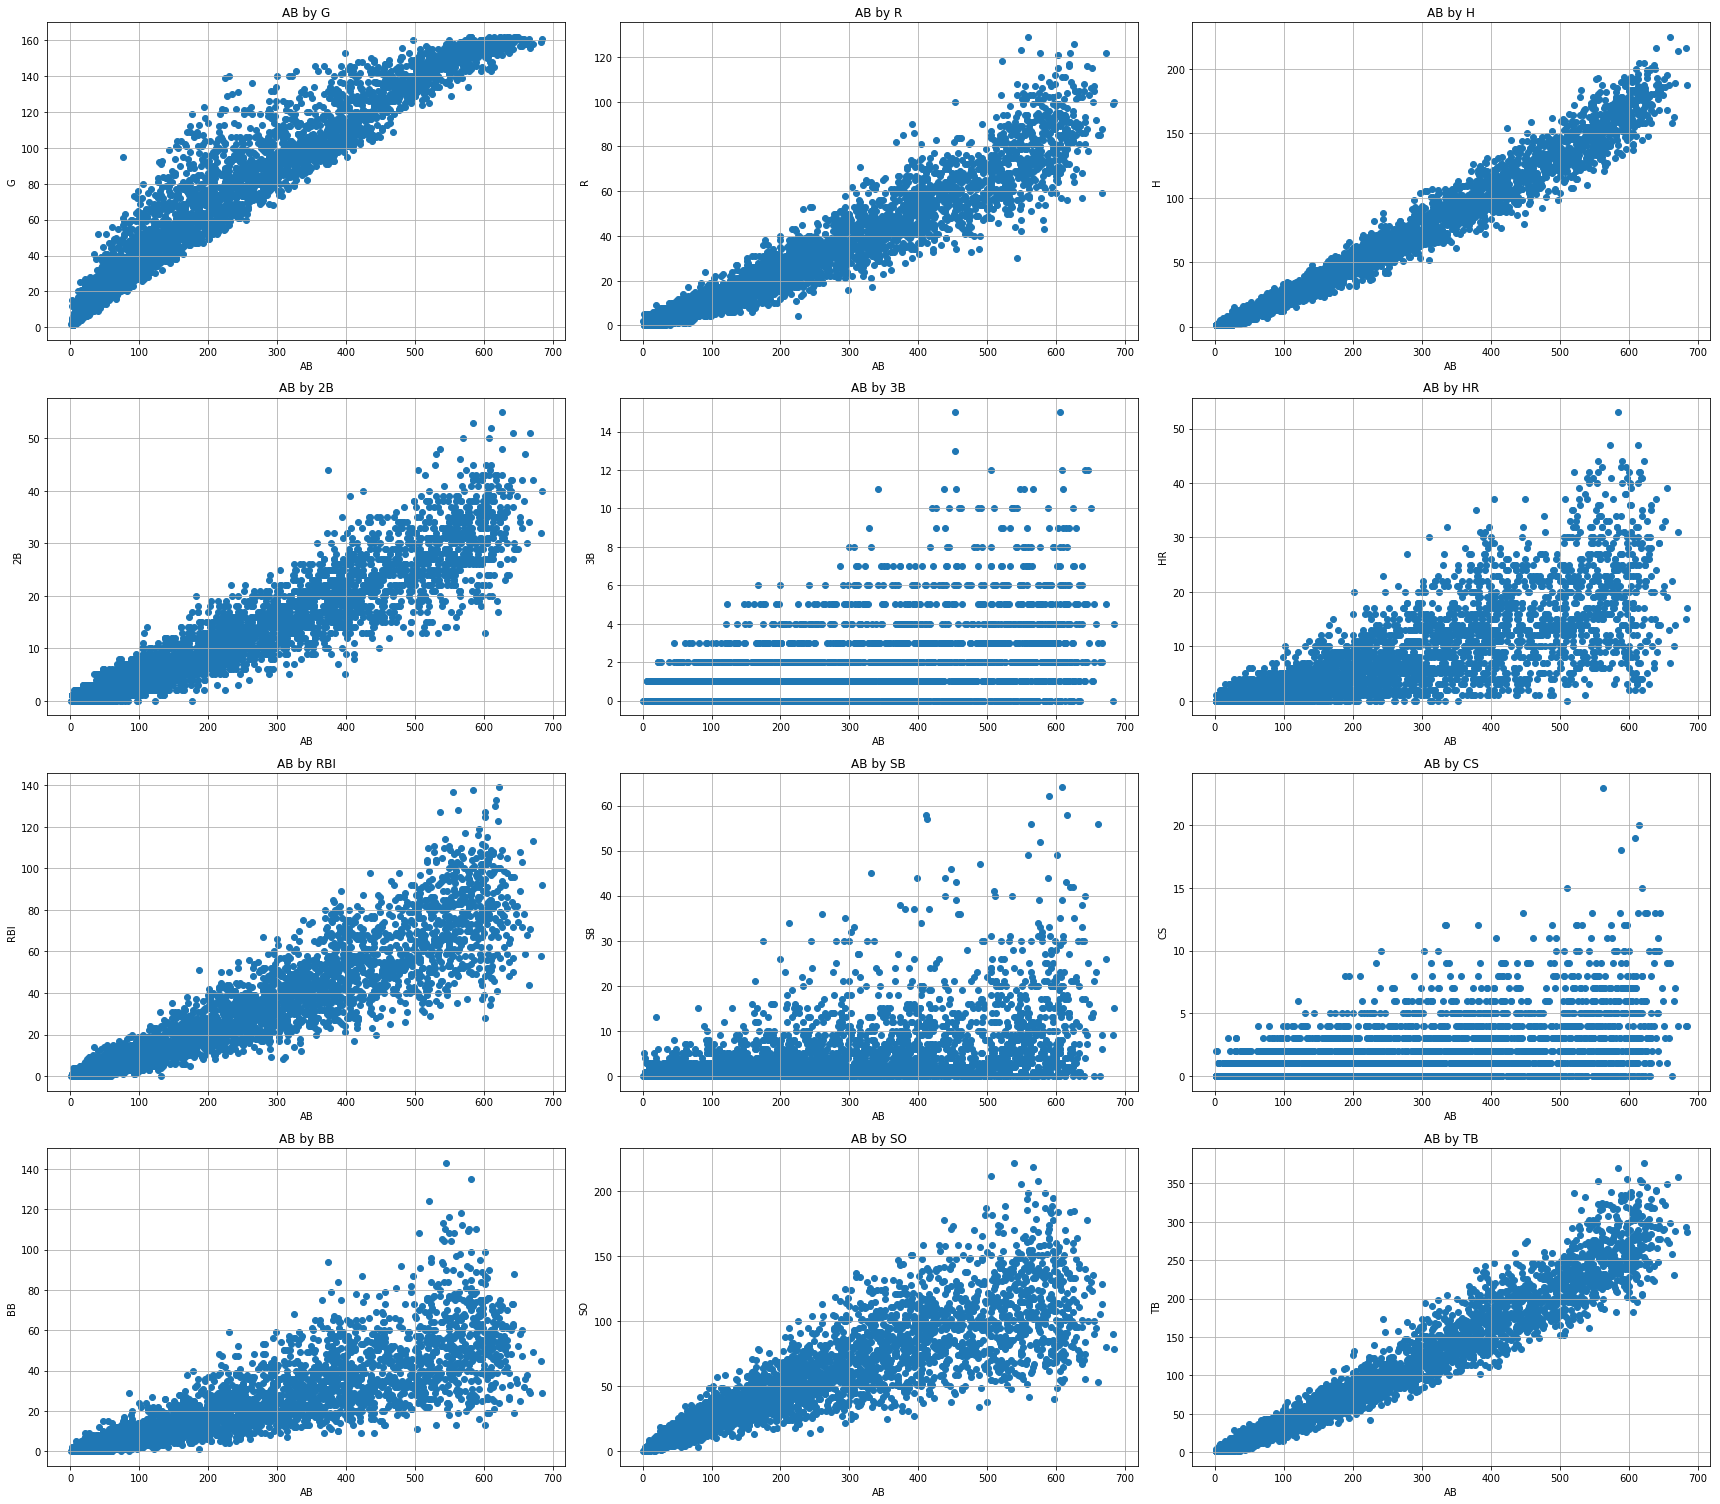

In [7]:
cols = [i for i in good_df.columns.tolist()]

grid_dimensions = (4,3)
subplot_size = (24,21)
subplot_df(good_df, cols[1], grid_dimensions, subplot_size)

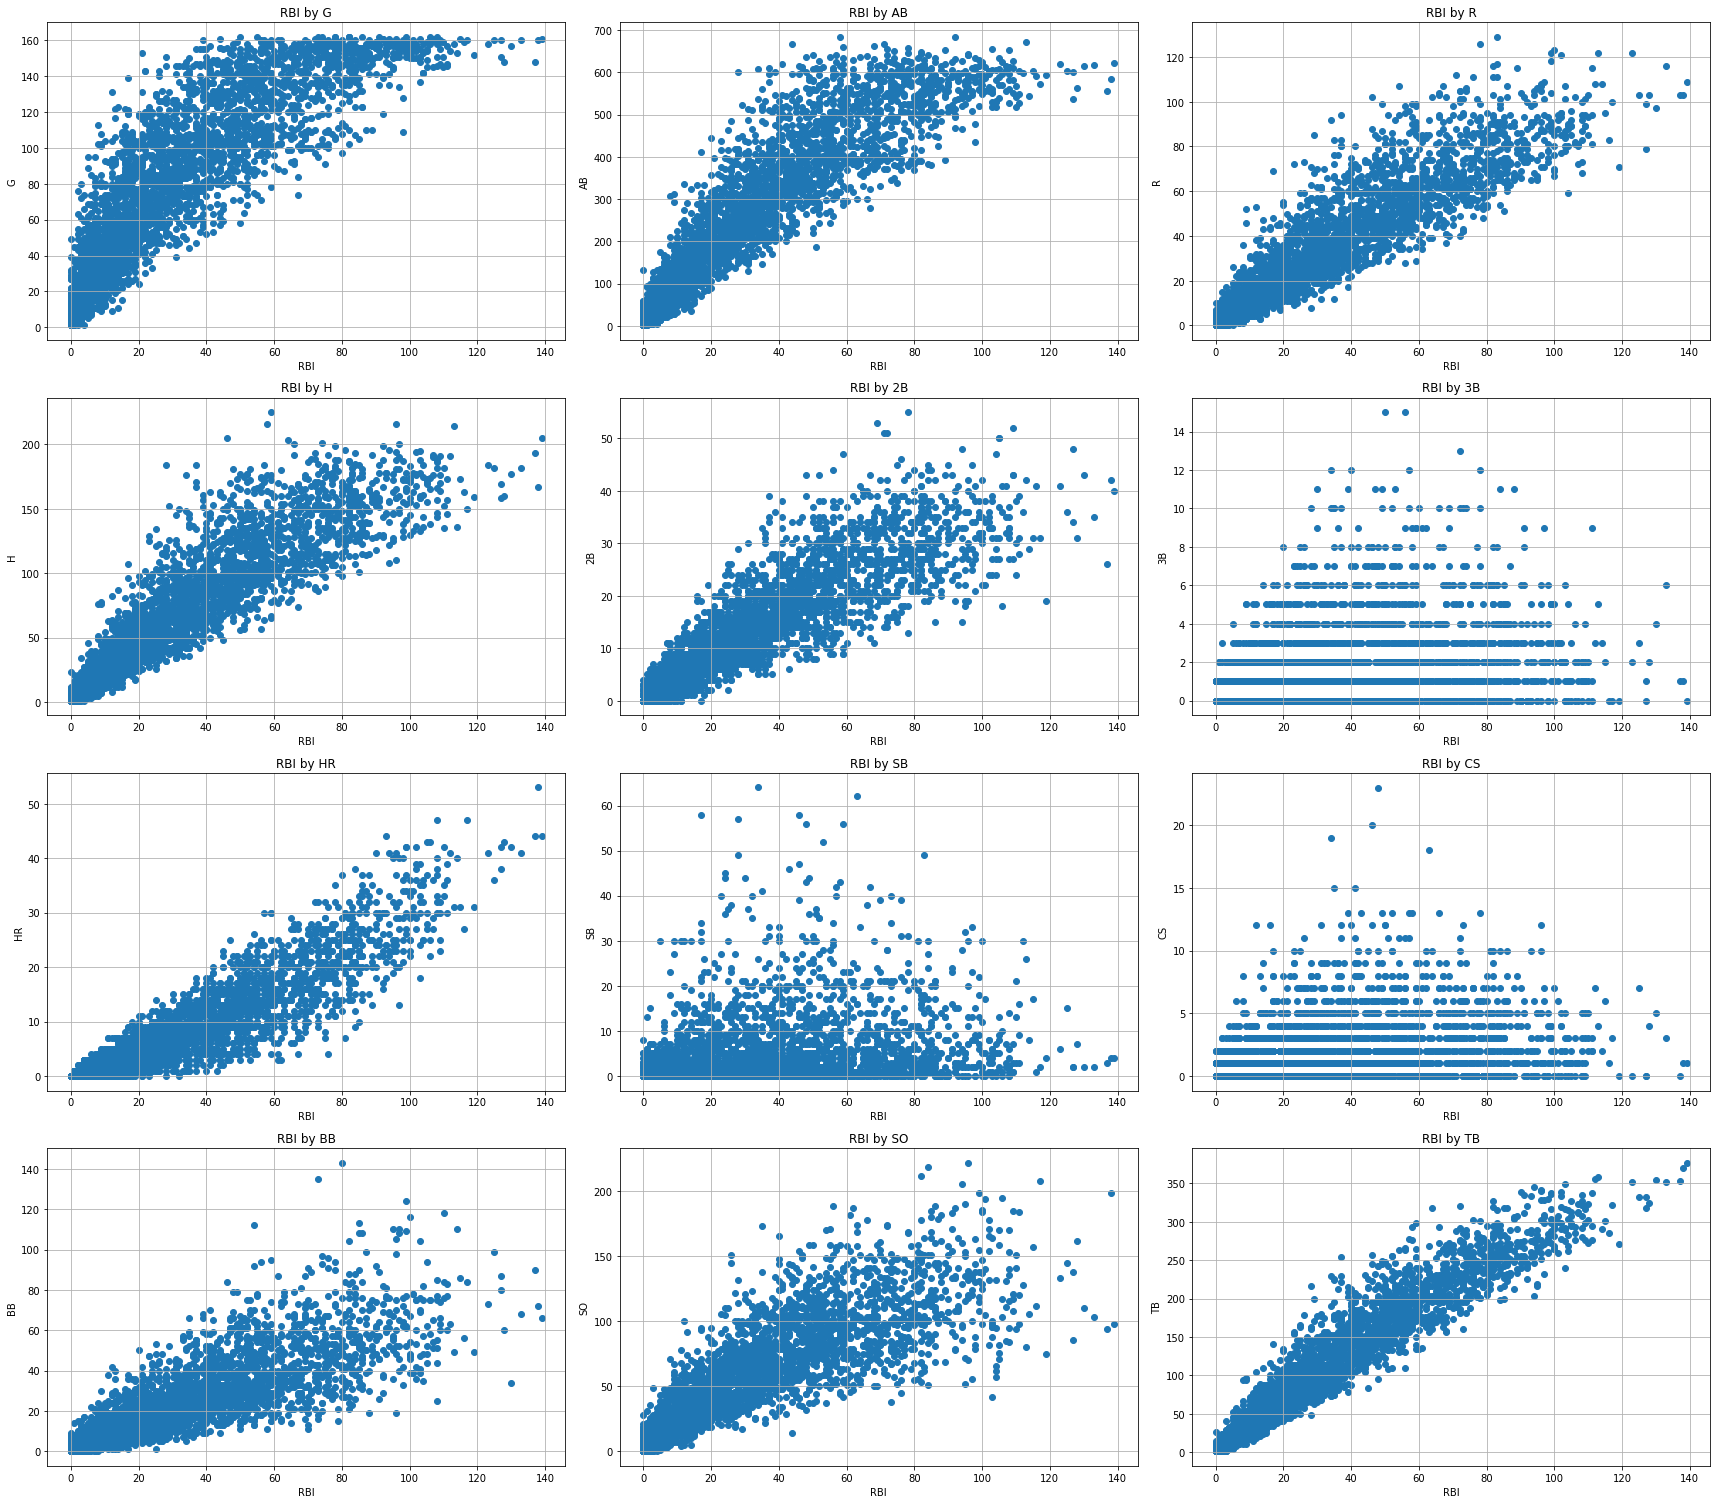

In [8]:
subplot_df(good_df, cols[7], grid_dimensions, subplot_size)

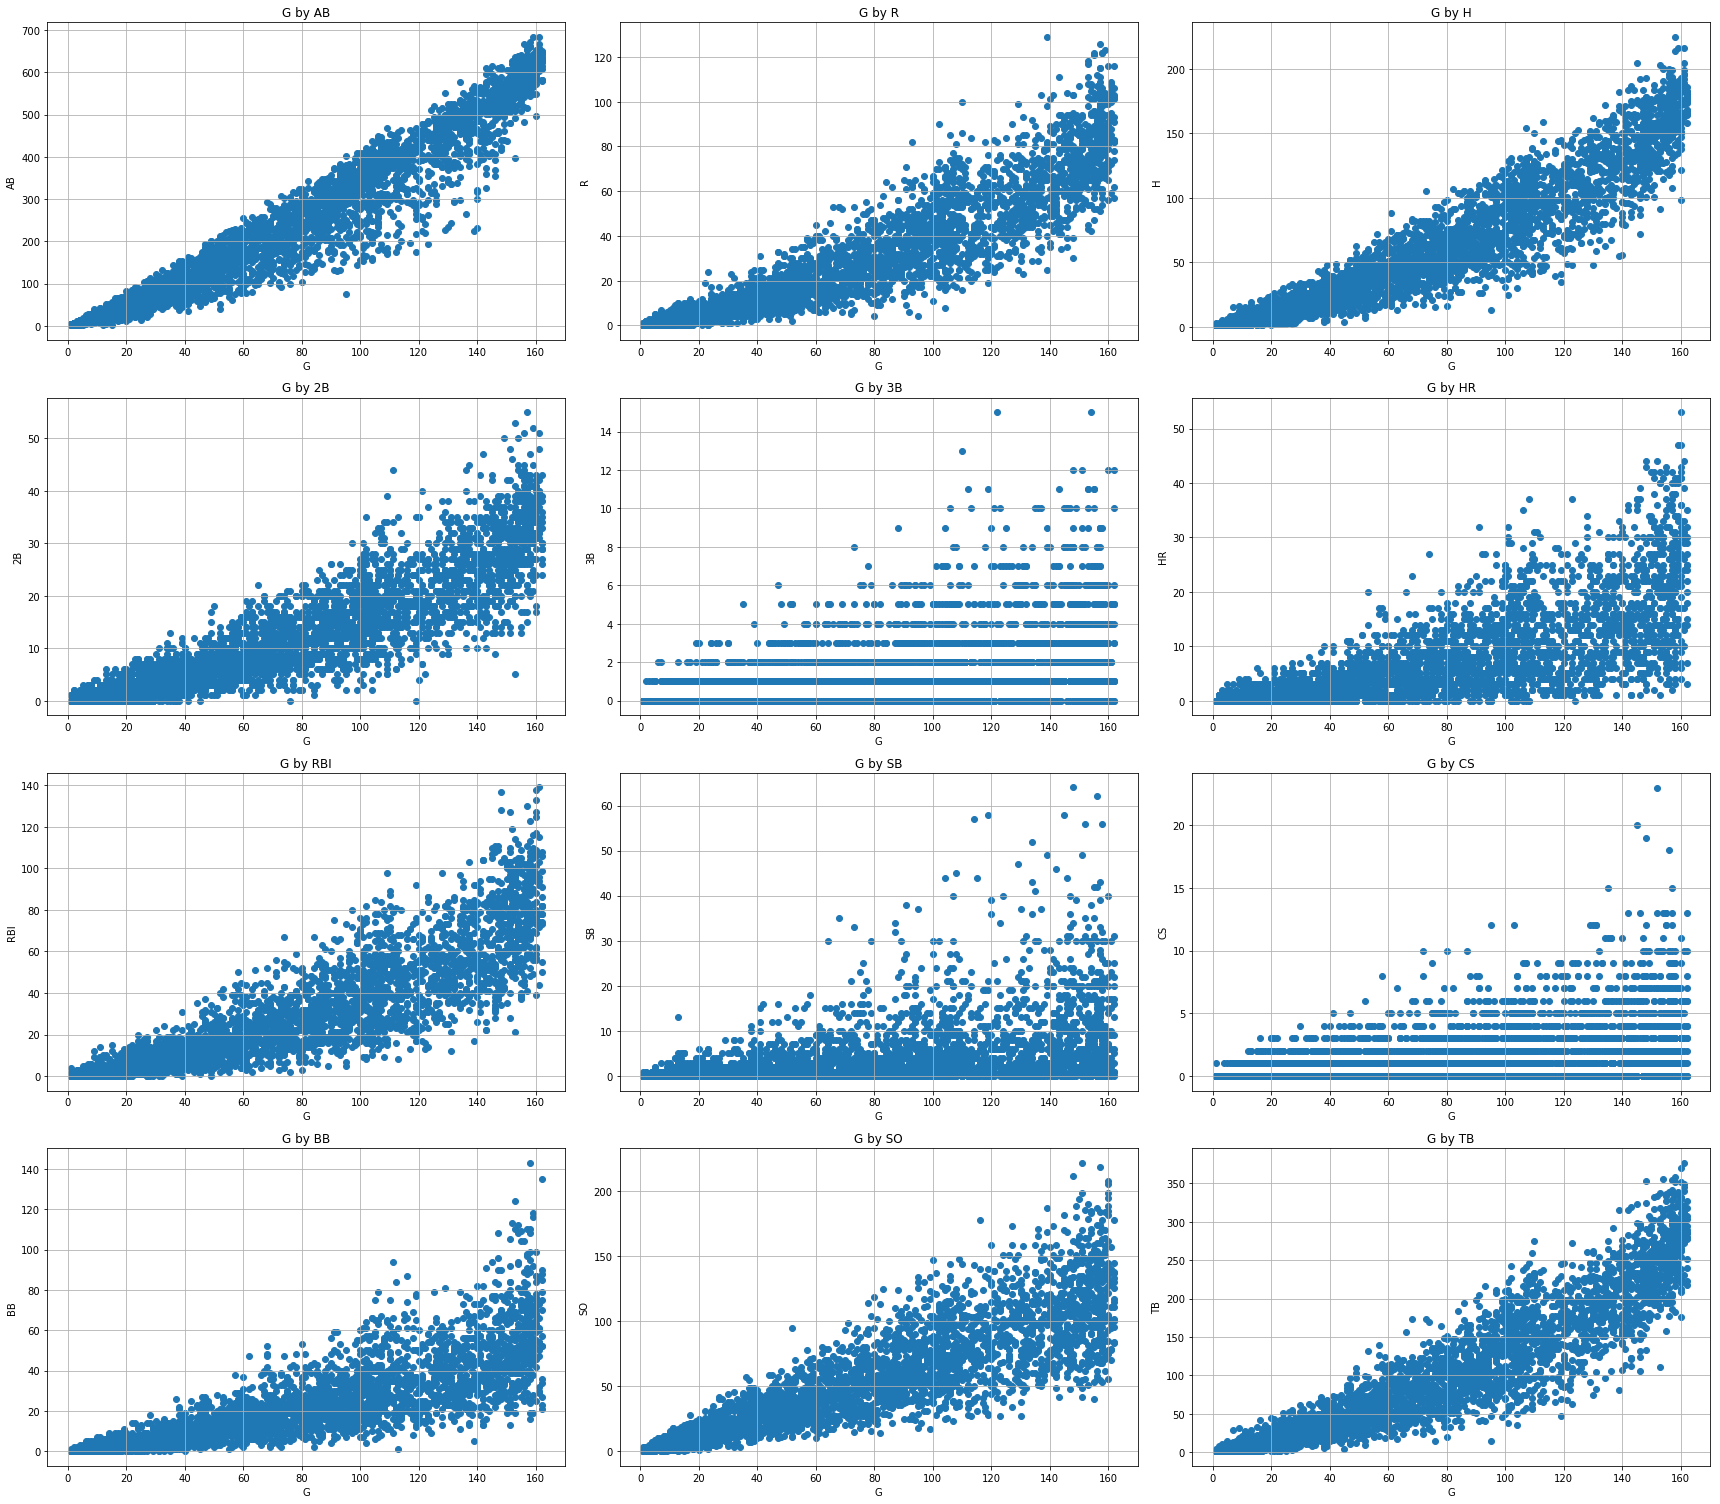

In [9]:
subplot_df(good_df, cols[0], grid_dimensions, subplot_size)